In [15]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from osgeo import osr
from osgeo import gdal 

In [19]:
file = r"/home/smitesh22/Data/DEM/N15E078_wgs84.tif"

In [20]:
im = Image.open(file)

In [21]:
im_data = np.asarray(im)

In [22]:
im_data

array([[209.43616 , 208.43616 , 207.43619 , ..., 612.43286 , 615.4326  ,
        620.4324  ],
       [209.43501 , 209.43503 , 208.43504 , ..., 605.43134 , 610.43115 ,
        615.4309  ],
       [211.43387 , 209.4339  , 208.4339  , ..., 603.4298  , 607.4296  ,
        609.4294  ],
       ...,
       [168.89189 , 168.8915  , 168.8911  , ...,  94.572235,  97.57225 ,
         98.57226 ],
       [167.89153 , 167.89113 , 168.89073 , ...,  93.5716  ,  96.57161 ,
         97.571625],
       [167.89116 , 167.89076 , 168.89037 , ...,  93.57097 ,  95.57098 ,
         97.57099 ]], dtype=float32)

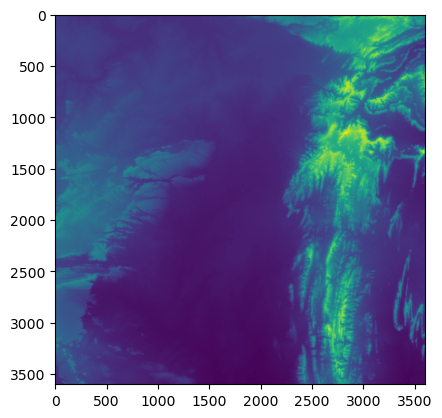

In [23]:
plt.imshow(im_data)

In [24]:
im_data.shape

(3601, 3601)

In [25]:
im = gdal.Open(file)

In [26]:
geotransform = im.GetGeoTransform()

In [27]:
projection = im.GetProjection()


In [28]:
# Extract corner coordinates
ulx, xres, xskew, uly, yskew, yres = geotransform
lrx = ulx + (im.RasterXSize * xres)
lry = uly + (im.RasterYSize * yres)

# Create coordinate transformation
source_projection = osr.SpatialReference()
source_projection.ImportFromWkt(projection)
target_projection = osr.SpatialReference()
target_projection.ImportFromEPSG(4326)  # Assuming you want WGS84 coordinates

transform = osr.CoordinateTransformation(source_projection, target_projection)

# Transform corner coordinates to target CRS
ul_lon, ul_lat, _ = transform.TransformPoint(ulx, uly)
lr_lon, lr_lat, _ = transform.TransformPoint(lrx, lry)

# Print the extracted coordinates
print("Upper Left: ", ul_lon, ul_lat)
print("Lower Right: ", lr_lon, lr_lat)
print("Upper Right: ", ul_lat, lr_lon)
print("Lower Left: ", lr_lat, ul_lon)

Upper Left:  77.99986111111112 16.000138888888888
Lower Right:  79.0001388888889 14.999861111111109
Upper Right:  16.000138888888888 79.0001388888889
Lower Left:  14.999861111111109 77.99986111111112


In [29]:
data = pd.read_csv("/home/smitesh22/Data/extent.csv")

In [30]:
import re
pattern = r"\/([^\/]+)\.tif$"

match = re.search(pattern, file)

filename = match.group(1)
print(filename)



N15E078_wgs84


In [31]:
new_data = {
    "filename": filename,
    "upper_lat": ul_lat,
    "upper_long": lr_lon,
    "lower_lat": lr_lat,
    "lower_long": ul_lon
}

In [32]:
new_row_df = pd.DataFrame([new_data])

# Concatenate the existing data with the new row DataFrame
data = pd.concat([data, new_row_df], ignore_index=True)

# Write the updated DataFrame back to CSV
data.to_csv("/home/smitesh22/Data/extent.csv", index=False)

In [33]:
data

,filename,upper_lat,upper_long,lower_lat,lower_long
0,N15E073_wgs84,16.000139,72.999861,14.999861,74.000139
1,N15E073_wgs84,16.000139,72.999861,14.999861,74.000139
2,N15E073_wgs84,16.000139,74.000139,14.999861,72.999861
3,N23E069_wgs84,24.000139,70.000139,22.999861,68.999861
4,N27E071_wgs84,28.000139,72.000139,26.999861,70.999861
5,N14E077_wgs84,15.000139,78.000139,13.999861,76.999861
6,N09E078_wgs84,10.000139,79.000139,8.999861,77.999861
7,N23E071_wgs84,24.000139,72.000139,22.999861,70.999861
8,N24E081_wgs84,25.000139,82.000139,23.999861,80.999861
9,N25E071_wgs84,26.000139,72.000139,24.999861,70.999861
